# Real time audio visualizing 

source: https://www.youtube.com/watch?v=AShHJdSIxkY&t=39s

## Contents
0. Install packages
1. Show live waveplot
2. Show live audio spectrum (with FFT) (TO DO)
3. Show live spectrogram (with isues...)


### To do:
- 2nd part of tutorial: display the audio spectrum in real time
- using https://github.com/cdens/PySpectrogram to display real time spectrogram

In [1]:
## 0. Install packages

## 1. Plot live waveform

In [24]:
import pyaudio
import struct #struct will unpack audio data into integers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib tk
#%matplotlib qt
#
%matplotlib inline
CHUNK = 1024 * 2 #=2048
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #sample rate

<IPython.core.display.Javascript object>


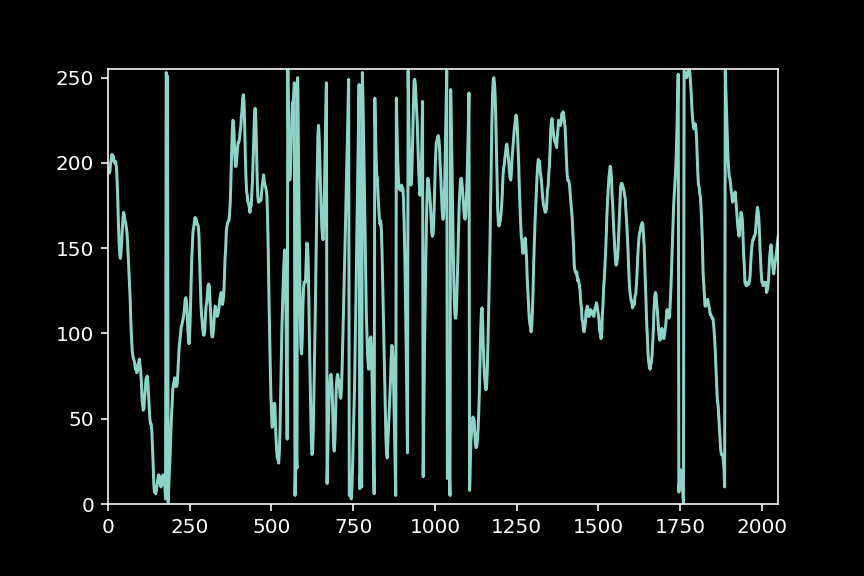

KeyboardInterrupt: 

In [23]:
%matplotlib notebook
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
fig, ax = plt.subplots()

x= np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))
ax.set_ylim(0,255)
ax.set_xlim(0, CHUNK)

while True:
    data = stream.read(CHUNK)
    #data_int = struct.unpack(str(CHUNK)+'h', data) 
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b' )[::2]+ 128
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()
# Close and terminate the stream
stream.close()
p.terminate()

## 2. Plot live audio spectrum (with FFT - ISSUE)

In [1]:
import pyaudio
import struct #struct will unpack audio data into integers
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib tk
#%matplotlib qt
#
%matplotlib inline
CHUNK = 1024 * 2 #=2048
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #sample rate

In [2]:
#SOURCE: https://www.youtube.com/watch?v=aQKX3mrDFoY&t=53s
%matplotlib notebook
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
fig, (ax, ax2) = plt.subplots(2, figsize=(15,8))

#variables for plotting
x= np.arange(0, 2 * CHUNK, 2)
x_fft = np.linspace(0, RATE, CHUNK)

#create a line object with random data
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=2)
line_fft = ax2.plot(x_fft, np.random.rand(CHUNK), '-', lw=2)#linewidth

#formatting axes
ax.set_ylim(0,255)
ax.set_xlim(0, CHUNK)
ax.set_title('Audio Waveform')

ax2.set_xlim(20, RATE / 2)

while True:
    data = stream.read(CHUNK)
    #data_int = struct.unpack(str(CHUNK)+'h', data) 
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b' )[::2]+ 128
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()
# Close and terminate the stream
stream.close()
p.terminate()

OSError: [Errno -9981] Input overflowed

## 3. Plot live spectrogram

In [11]:
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['my-audio.wav', 'new_file.wav', 'out.wav', 'file.wav', 'loudness.wav', 'test2.wav', 'claxon_iphone.wav', 'test3.wav', 'my_wav.wav', 'mywav_reduced_noise2.wav', 'Yoda.wav', 'piano_c.wav', 'claxon_michiel.wav', 'claxon_close.wav', 'miaow_16k.wav', 'tone_220.wav', 'welcome.wav', 'silence.wav', 'example.wav', '11k16bitpcm.wav', 'claxon_freesound.wav', 'robot0.wav', 'my_test.wav', 'converted.wav', 'speech_whistling2.wav', 'robot1.wav', 'mywav_reduced_noise.wav', 'robot3.wav', 'test.wav', 'noise_add.wav', 'converted2.wav', 'robot2.wav', 'Sample_audio.wav', 'tone_440.wav', 'claxon_1m.wav', 'output.wav']


### 3a. Frame by Frame

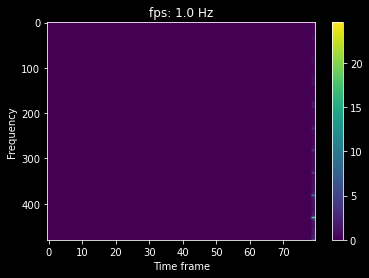

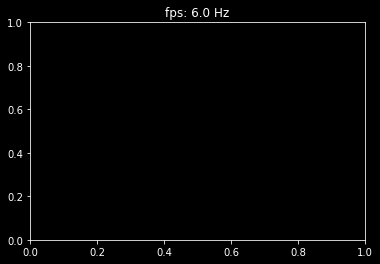

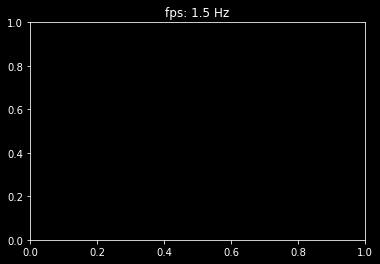

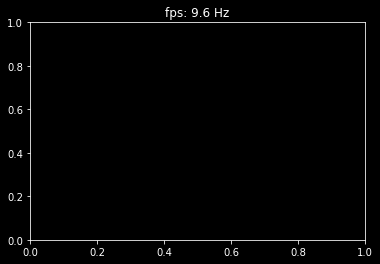

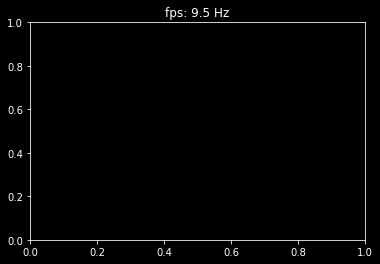

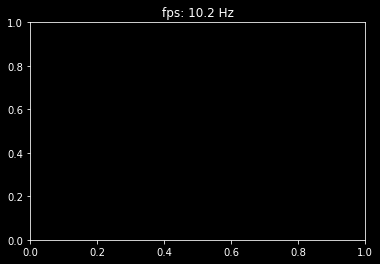

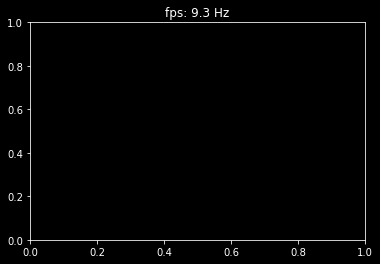

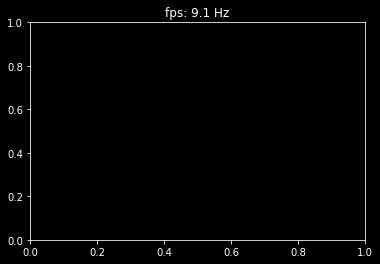

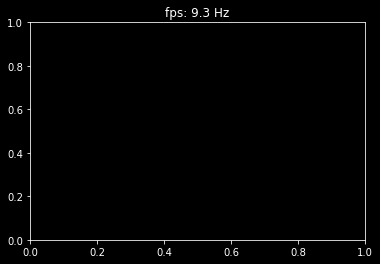

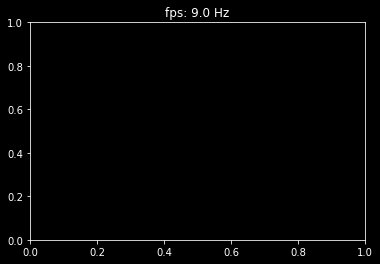

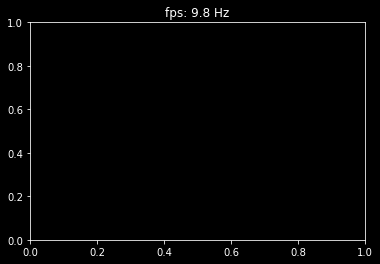

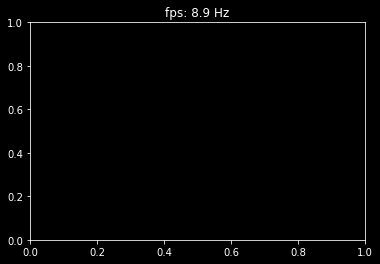

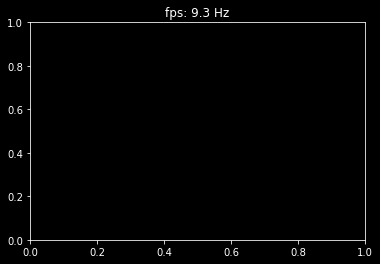

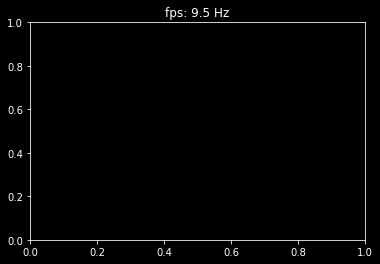

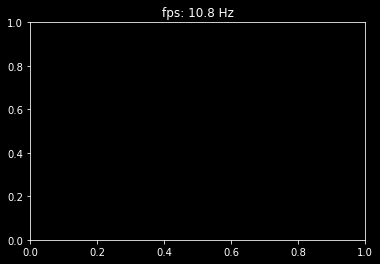

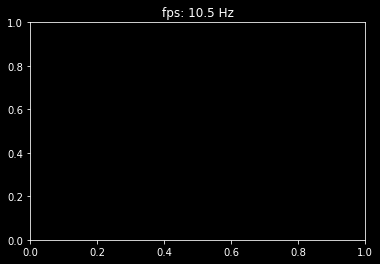

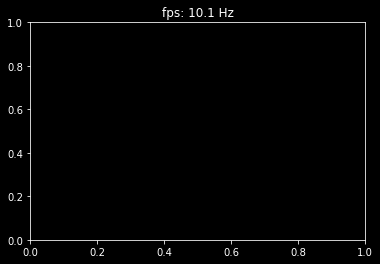

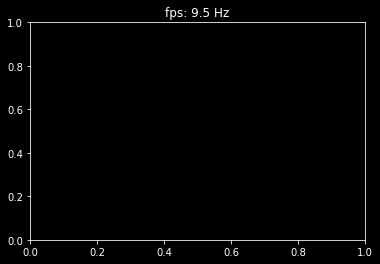

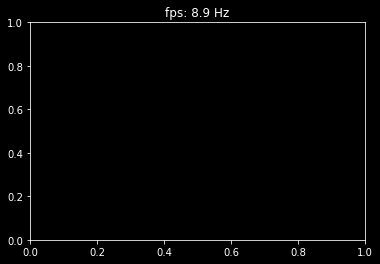

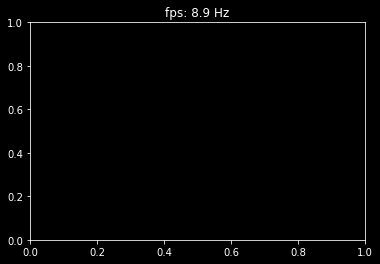

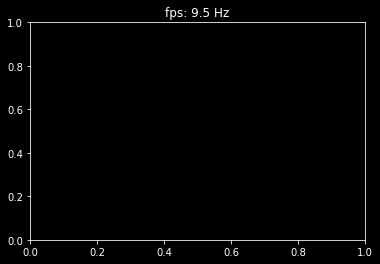

In [17]:
#source: https://github.com/Kurene/plot-spectrogram-in-realtime-by-matplotlib
# this script creates frame after frame and so create a movie...
%matplotlib inline
"""
License: MIT
Created by Kurene@wizard-notes.com
"""
import time
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

plt.style.use('dark_background')


# Parameters (audio)
sr         = 44100
n_ch       = 2
filepath   = "piano_c.wav"
n_fft      = 4096
hop_length = int(n_fft / 4 * 3) # 0 <= hop_length < n_fft
overlap    = n_fft - hop_length
n_plot_tf  = 80
n_freqs    = n_fft//2 + 1
f_max_idx  = 480 # 1 < f_max_idx < n_freqs
window     = np.hamming(n_fft)
amp        = np.zeros((n_plot_tf, f_max_idx))

# Parameters (plot, video)
fps = 1.0
fig, ax = plt.subplots()
image = ax.imshow(amp.T, aspect="auto")
ax.set_xlabel(f"Time frame")
ax.set_ylabel(f"Frequency")
fig.colorbar(image)
vmax, vmin = 1.0, 0.0
#min_fps = sr / hop_length

pretime = time.time()
for index, block in enumerate(sf.blocks(filepath, blocksize=n_fft, overlap=overlap)):
    if block.shape[0] != n_fft:
        continue
    
    x = np.mean(block, axis=1) # to monoral
    amp[-1] = np.sqrt(np.abs(np.fft.rfft(window * x)))[0:f_max_idx]
    if vmax < np.max(amp[-1]):
        vmax = np.max(amp[-1])
    image.set_clim(vmin, vmax)
    image.set_data(amp.T[::-1])
    
    #plt.title(f"fps: {fps:0.1f} Hz\n(min. fps requirement: {min_fps:0.1f} Hz)")
    plt.title(f"fps: {fps:0.1f} Hz")
    plt.pause(0.001)

    amp[0:-1] = amp[1::]

    curtime = time.time()
    time_diff = curtime - pretime
    fps = 1.0/(time_diff + 1e-16)
    #print(f"{index}:\t{time_diff:0.3f} sec")
    pretime = curtime
    
plt.close()

### 3b. Using PySpectrogram
source: https://github.com/cdens/PySpectrogram

This package uses pyQt5 to create a GUI. Not sure whether this works in Jupyter Notebook...

## 3c. Using a third script
source: https://stackoverflow.com/questions/43353172/producing-spectrogram-from-microphone

In [4]:
import pyaudio
import struct
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


THRESHOLD = 40 # dB
RATE = 44100
INPUT_BLOCK_TIME = 0.03 # 30 ms
INPUT_FRAMES_PER_BLOCK = int(RATE * INPUT_BLOCK_TIME)

def get_rms(block):
    return np.sqrt(np.mean(np.square(block)))

class AudioHandler(object):
    def __init__(self):
        self.pa = pyaudio.PyAudio()
        self.stream = self.open_mic_stream()
        self.threshold = THRESHOLD
        self.plot_counter = 0

    def stop(self):
        self.stream.close()

    def find_input_device(self):
        device_index = None
        for i in range( self.pa.get_device_count() ):
            devinfo = self.pa.get_device_info_by_index(i)
            print('Device %{}: %{}'.format(i, devinfo['name']))

            for keyword in ['mic','input']:
                if keyword in devinfo['name'].lower():
                    print('Found an input: device {} - {}'.format(i, devinfo['name']))
                    device_index = i
                    return device_index

        if device_index == None:
            print('No preferred input found; using default input device.')

        return device_index

    def open_mic_stream( self ):
        device_index = self.find_input_device()

        stream = self.pa.open(  format = pyaudio.paInt16,
                                channels = 1,
                                rate = RATE,
                                input = True,
                                input_device_index = device_index,
                                frames_per_buffer = INPUT_FRAMES_PER_BLOCK)

        return stream

    def processBlock(self, snd_block):
        f, t, Sxx = signal.spectrogram(snd_block, RATE)
        plt.pcolormesh(t, f, Sxx)
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        #plt.savefig('data/spec{}.png'.format(self.plot_counter), bbox_inches='tight')
        self.plot_counter += 1

    def listen(self):
        try:
            raw_block = self.stream.read(INPUT_FRAMES_PER_BLOCK, exception_on_overflow = False)
            count = len(raw_block) / 2
            format = '%dh' % (count)
            snd_block = np.array(struct.unpack(format, raw_block))
        except Exception as e:
            print('Error recording: {}'.format(e))
            return

        amplitude = get_rms(snd_block)
        if amplitude > self.threshold:
            self.processBlock(snd_block)
        else:
            pass

if __name__ == '__main__':
    audio = AudioHandler()
    for i in range(0,100):
        audio.listen()

Device %0: %MacBook Pro Microphone
Found an input: device 0 - MacBook Pro Microphone


In [8]:
import pyaudio
import struct
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time
from scipy.io.wavfile import write

THRESHOLD = 0 # dB
RATE = 44100
INPUT_BLOCK_TIME = 1 # 30 ms
INPUT_FRAMES_PER_BLOCK = int(RATE * INPUT_BLOCK_TIME)
INPUT_FRAMES_PER_BLOCK_BUFFER = int(RATE * INPUT_BLOCK_TIME)

def get_rms(block):
    return np.sqrt(np.mean(np.square(block)))

class AudioHandler(object):
    def __init__(self):
        self.pa = pyaudio.PyAudio()
        self.stream = self.open_mic_stream()
        self.threshold = THRESHOLD
        self.plot_counter = 0

    def stop(self):
        self.stream.close()

    def find_input_device(self):
        device_index = None
        for i in range( self.pa.get_device_count() ):
            devinfo = self.pa.get_device_info_by_index(i)
            print('Device %{}: %{}'.format(i, devinfo['name']))

            for keyword in ['mic','input']:
                if keyword in devinfo['name'].lower():
                    print('Found an input: device {} - {}'.format(i, devinfo['name']))
                    device_index = i
                    return device_index

        if device_index == None:
            print('No preferred input found; using default input device.')

        return device_index

    def open_mic_stream( self ):
        device_index = self.find_input_device()

        stream = self.pa.open(  format = self.pa.get_format_from_width(2,False),
                                channels = 1,
                                rate = RATE,
                                input = True,
                                input_device_index = device_index)

        stream.start_stream()
        return stream

    def processBlock(self, snd_block):
        f, t, Sxx = signal.spectrogram(snd_block, RATE)
        zmin = Sxx.min()
        zmax = Sxx.max()
        plt.pcolormesh(t, f, Sxx, cmap='RdBu', norm=LogNorm(vmin=zmin, vmax=zmax))
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.axis([t.min(), t.max(), f.min(), f.max()])
        plt.colorbar()
        #plt.savefig('data/spec{}.png'.format(self.plot_counter), bbox_inches='tight')
        plt.close()
        write('data/audio{}.wav'.format(self.plot_counter),RATE,snd_block)
        self.plot_counter += 1

    def listen(self):
        try:
            print("start", self.stream.is_active(), self.stream.is_stopped())
            #raw_block = self.stream.read(INPUT_FRAMES_PER_BLOCK, exception_on_overflow = False)

            total = 0
            t_snd_block = []
            while total < INPUT_FRAMES_PER_BLOCK:
                while self.stream.get_read_available() <= 0:
                    print('waiting')
                    time.sleep(0.01)
                while self.stream.get_read_available() > 0 and total < INPUT_FRAMES_PER_BLOCK:
                    raw_block = self.stream.read(self.stream.get_read_available(), exception_on_overflow = False)
                    count = len(raw_block) / 2
                    total = total + count
                    print ("done"), total,count
                    format = '%dh' % (count)
                    t_snd_block.append(np.fromstring(raw_block,dtype=np.int16))
            snd_block = np.hstack(t_snd_block)
        except Exception as e:
            print('Error recording: {}'.format(e))
            return

        self.processBlock(snd_block)

if __name__ == '__main__':
    audio = AudioHandler()
    for i in range(0,5):
        audio.listen()

Device %0: %MacBook Pro Microphone
Found an input: device 0 - MacBook Pro Microphone
start True False
waiting
waiting
waiting
waiting
waiting
waiting
waiting
done
done
waiting
done
done
waiting
done
waiting
done
done
waiting
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
waiting


/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_1280/3702381872.py:90: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  t_snd_block.append(np.fromstring(raw_block,dtype=np.int16))


done
waiting
done
waiting
done
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting
done
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
done
waiting
done
done
waiting
done
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting
done
waiting
done
waiting
done
done
waiting
done
waiting
done
waiting

FileNotFoundError: [Errno 2] No such file or directory: 'data/audio0.wav'

In [9]:
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['my-audio.wav', 'new_file.wav', 'out.wav', 'file.wav', 'loudness.wav', 'test2.wav', 'claxon_iphone.wav', 'test3.wav', 'my_wav.wav', 'mywav_reduced_noise2.wav', 'Yoda.wav', 'piano_c.wav', 'claxon_michiel.wav', 'claxon_close.wav', 'miaow_16k.wav', 'tone_220.wav', 'welcome.wav', 'silence.wav', 'example.wav', '11k16bitpcm.wav', 'claxon_freesound.wav', 'robot0.wav', 'my_test.wav', 'converted.wav', 'speech_whistling2.wav', 'robot1.wav', 'mywav_reduced_noise.wav', 'robot3.wav', 'test.wav', 'noise_add.wav', 'converted2.wav', 'robot2.wav', 'Sample_audio.wav', 'tone_440.wav', 'claxon_1m.wav', 'output.wav']


In [13]:
import librosa
librosa.get_samplerate(my_wavs[0])

44100

AxisError: axis 1 is out of bounds for array of dimension 1

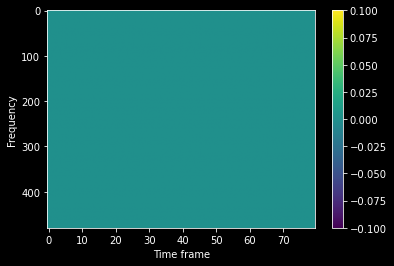

In [14]:
#source:https://github.com/Kurene/plot-spectrogram-in-realtime-by-matplotlib
%matplotlib inline
"""
License: MIT
Created by Kurene@wizard-notes.com
"""
import time
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

plt.style.use('dark_background')


# Parameters (audio)
sr         = 44100
n_ch       = 2
filepath   = my_wavs[0]
n_fft      = 4096
hop_length = int(n_fft / 4 * 3) # 0 <= hop_length < n_fft
overlap    = n_fft - hop_length
n_plot_tf  = 80
n_freqs    = n_fft//2 + 1
f_max_idx  = 480 # 1 < f_max_idx < n_freqs
window     = np.hamming(n_fft)
amp        = np.zeros((n_plot_tf, f_max_idx))

# Parameters (plot, video)
fps = 1.0
fig, ax = plt.subplots()
image = ax.imshow(amp.T, aspect="auto")
ax.set_xlabel(f"Time frame")
ax.set_ylabel(f"Frequency")
fig.colorbar(image)
vmax, vmin = 1.0, 0.0
#min_fps = sr / hop_length

pretime = time.time()
for index, block in enumerate(sf.blocks(filepath, blocksize=n_fft, overlap=overlap)):
    if block.shape[0] != n_fft:
        continue
    
    x = np.mean(block, axis=1) # to monoral
    amp[-1] = np.sqrt(np.abs(np.fft.rfft(window * x)))[0:f_max_idx]
    if vmax < np.max(amp[-1]):
        vmax = np.max(amp[-1])
    image.set_clim(vmin, vmax)
    image.set_data(amp.T[::-1])
    
    #plt.title(f"fps: {fps:0.1f} Hz\n(min. fps requirement: {min_fps:0.1f} Hz)")
    plt.title(f"fps: {fps:0.1f} Hz")
    plt.pause(0.001)

    amp[0:-1] = amp[1::]

    curtime = time.time()
    time_diff = curtime - pretime
    fps = 1.0/(time_diff + 1e-16)
    #print(f"{index}:\t{time_diff:0.3f} sec")
    pretime = curtime